# Assignment 2

Firstly, I have collected the data from the app "WiFi Analyzer" and make a list of distance and RSSI as given below.
After that I have converted the distance in log10(x).

Now, using matplotlib library graph has been plotted and using polyfit(inbuilt funtion to find best fit) I have calculated slope and intercept value.

By using the formula - path loss exponent is equal to absolute value of slop/10, I have calculated path loss exponent.
And then show the path loss exponent and variance in the last. 

Path Loss exponent  1.399541922468965
Variance of the RSSI value  61.642105263157895


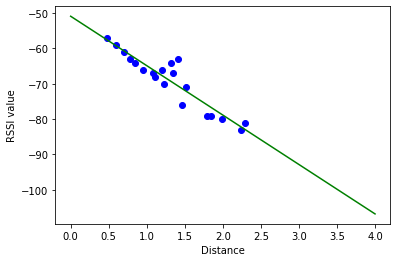

In [31]:
import numpy as np
from matplotlib import pyplot as plt
import statistics
from math import log10

#Reported the distance and RSSI value from the wifi Analyzer APP
distance = [7, 6, 5, 4, 13, 33, 29, 26, 21, 16, 17, 69, 98, 62, 174, 195, 3, 22,9,12]
RSSI = [-64, -63,-61 , -59, -68, -71, -76, -63, -64, -66, -70, -79, -80, -79, -83, -81, -57,-67,-66,-67]

Distance = [log10(x) for x in distance] #convert the distance in log



#plot the graph 
plt.scatter(Distance,RSSI,color='blue')
plt.xlabel("Distance")
plt.ylabel("RSSI value")

#calculate the best fit line to the points 
best_fit=np.polyfit(Distance,RSSI,1)
best_fit_fn = np.poly1d(best_fit)

x_s=np.arange(0,5)
plt.plot(x_s,best_fit_fn(x_s),color="green")

#slope of the best fit line
slope_of_best_fit = best_fit[0]

#calculate the path lost exponent value by the formula given below
path_loss_exponent = abs(slope_of_best_fit/10)

print("Path Loss exponent ",path_loss_exponent)
print("Variance of the RSSI value ",statistics.variance(RSSI))



plt.show()

# Step 2

By considering d0 as 1 meter, the value of log(d0) to base 10 is 0.
And Power at this point is the intercept of the graphs as we have calculated in the previous step.
So, Power at d0 is best_fit[1] (calculated above)

Now, To calculate the distance we will use the formula as given in the assignment sheet.

In [32]:
from statistics import mean

#intercept of best fit line gives power at d0
power_at_d0 = best_fit[1]

#list of power calculated at different places
# distance = [7,8,21,26,29,33]

# RSSI=[-65,-66,-74,-76,-77,-78]

RSSI =[-65, -50, -96, -85, -75]
distance =  [1.04139269, 0.77815125, 2.54032947, 2.24054925, 1.74036269]

#list of error in distance taken and distance calculated
error_list = []


# function to caalculate the estimated distance by formula
def give_distance(power):
    
    #calculate estimated distance in log
    estimated_distance = (power_at_d0-power)/(10*path_loss_exponent)
    return estimated_distance
    



for i in range(5):
    cal_distance = give_distance(RSSI[i])
    
    error_list.append(abs(cal_distance-distance[i]))

average_error = mean(error_list)

print("Average distance error of the five data is ",average_error)


Average distance error of the five data is  0.35411791928909103
